<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/4)%20Feature%20-%20Compare%20experiments%20-%20compare%20experiments%20across%20backends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals

### 1. Understand how you can compare experiments on same data

### 2. Understand where to look for comparison data - logs, charts, graphs, etc when comparing experiments


### 3. Steps
    - You will use 3 backends - keras, mxnet, and pytorch
    - Train three classifiers by keeping all parameters same and changing backends
    - You will keep the model as resnet50
    - Compare the three experiments

### Why compare experiments

    - One usually runs mulitple experiments on the same data by changing hyper-params, base model, etc
    
    - Hence this compare exxperiments feature helps to see which combination og params works the best for that data

# Table of Contents


## [Install](#0)


## [Train a classifier using Mxnet backend](#1)


## [Train a classifier using Pytorch backend](#2)


## [Train a classifier using Keras backend](#3)


## [Compare experiments](#4)


## [Visualize and study comparison metrics](#5)

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset - Malarial cell images
    - Credits: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC" -O malaria_cell.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq malaria_cell.zip

# Imports 

In [1]:
#Using gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

<a id='1'></a>
# Train a classifier using Mxnet Backend

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [2]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-gluon");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-gluon
    Dir: /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-gluon/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-gluon
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [3]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet50_v2", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           resnet50_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50_v2
        Num of potentially trainable layers:  105
        N

/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [4]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------





    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.701, Train-loss: 0.669 | Val-acc: 0.666116, Val-loss: 0.805, | time: 6.4 sec

    Epoch 2/5
    ----------





    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.787, Train-loss: 0.499 | Val-acc: 0.636364, Val-loss: 1.085, | time: 6.3 sec

    Epoch 3/5
    ----------





    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.776, Train-loss: 0.531 | Val-acc: 0.730579, Val-loss: 0.588, | time: 6.5 sec

    Epoch 4/5
    ----------





    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.773, Train-loss: 0.553 | Val-acc: 0.727273, Val-loss: 0.691, | time: 6.3 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.796, Train-loss: 0.529 | Val-acc: 0.823140, Val-loss: 0.434, | time: 6.5 sec

    Training completed in: 0m 30s
    Best val Acc:          0.823140

Training End

Training Outputs
    Model Dir:   /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-gluon/output/models/
    Log Dir:     /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-gluon/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Valid

<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Train a classifier using Pytorch Backend

In [5]:
#Using pytorch backend 

# When installed using pip
from monk.pytorch_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.pytorch_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [6]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-pytorch");

Pytorch Version: 1.4.0

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-pytorch
    Dir: /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-pytorch/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-pytorch
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [7]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet50", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1



In [8]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.686, Train-loss: 0.765 | Val-acc: 0.831405, Val-loss: 0.390, | time: 10.0 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.793, Train-loss: 0.555 | Val-acc: 0.923967, Val-loss: 0.210, | time: 10.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.779, Train-loss: 0.576 | Val-acc: 0.753719, Val-loss: 0.640, | time: 9.8 sec

    Epoch 4/5
    ----------


Epoch     4: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.811, Train-loss: 0.567 | Val-acc: 0.841322, Val-loss: 0.382, | time: 9.8 sec

    Epoch 5/5
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.843, Train-loss: 0.374 | Val-acc: 0.919008, Val-loss: 0.216, | time: 9.9 sec

    Training completed in: 0m 47s
    Best val Acc:          0.923967

Training End

Training Outputs
    Model Dir:   /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-pytorch/output/models/
    Log Dir:     /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-pytorch/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve

<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Train a classifier using keras backend

In [9]:
#Using keras backend 

# When installed using pip
from monk.keras_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.keras_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [10]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-keras");

Keras Version: 2.3.0
Tensorflow Version: 2.0.0

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-keras
    Dir: /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-keras/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-keras
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [11]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet50", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7

Found 1412 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 1412
    Num val images:   604
    Num classes:      2

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  108
        Num trainable layers: 2

Optimizer
    Name:          sgd
    Learning rate: 0.0001
    Params:        {'lr': 0.0001, 'momentum': 0.9, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   reduceonplateaulr
    Params: {'mode': 'min', 'factor': 0.1, 'p

In [12]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
353/353 [==============================] - 11s 32ms/step - loss: 0.5183 - accuracy: 0.7443 - val_loss: 1.1040 - val_accuracy: 0.7301

Epoch 00001: saving model to workspace/Malaria-Cell/exp-keras/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 1.10396, saving model to workspace/Malaria-Cell/exp-keras/output/models/best_model.h5

Epoch 00001: saving model to workspace/Malaria-Cell/exp-keras/output/models/intermediate_model_01.h5
Epoch 2/5
353/353 [==============================] - 7s 21ms/step - loss: 0.3726 - accuracy: 0.8357 - val_loss: 0.5781 - val_accuracy: 0.7583

Epoch 00002: saving model to workspace/Malaria-Cell/exp-keras/output/models/resume_state.h5

Epoch 00002: val_loss improved from 1.10396 to 0.57811, saving model to workspace/Malaria-Cell/exp-keras/output/models/best_model.h5

Epoch 00002: saving model to workspace/Malaria-Cell/exp-keras/output/models/intermediate_model_02.h5
Epoch 3/5
353/353 [===========================

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Compare experiments

In [13]:
# Invoke the comparison class
from monk.compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [14]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Sample-Comparison-2");

Comparison: - Sample-Comparison-2


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Sample-Comparison-2
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [15]:
gtf.Add_Experiment("Malaria-Cell", "exp-gluon");
gtf.Add_Experiment("Malaria-Cell", "exp-pytorch");
gtf.Add_Experiment("Malaria-Cell", "exp-keras");

Project - Malaria-Cell, Experiment - exp-gluon added
Project - Malaria-Cell, Experiment - exp-pytorch added
Project - Malaria-Cell, Experiment - exp-keras added


### Run Analysis

In [16]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<a id='5'></a>
# Visualize and study comparison metrics

### Training Accuracy Curves

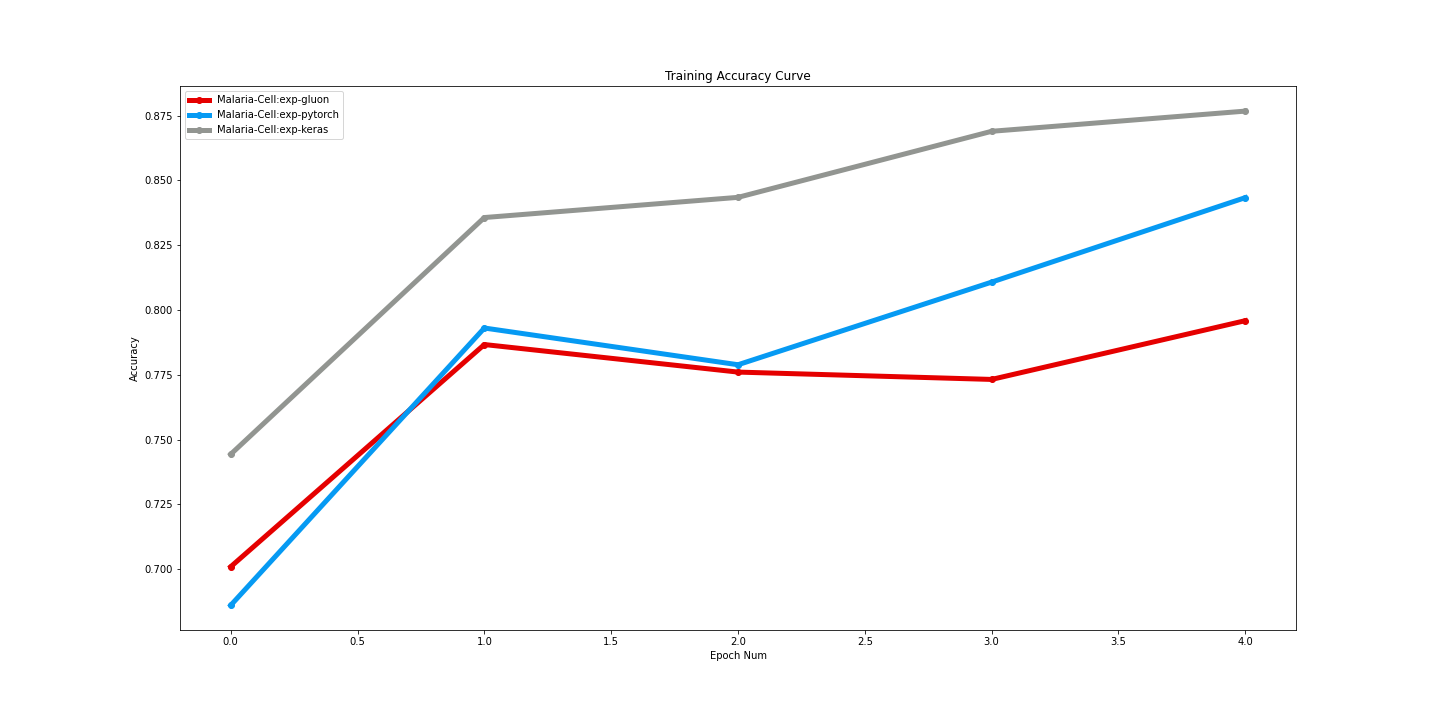

In [17]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/train_accuracy.png") 

### Training Loss Curves

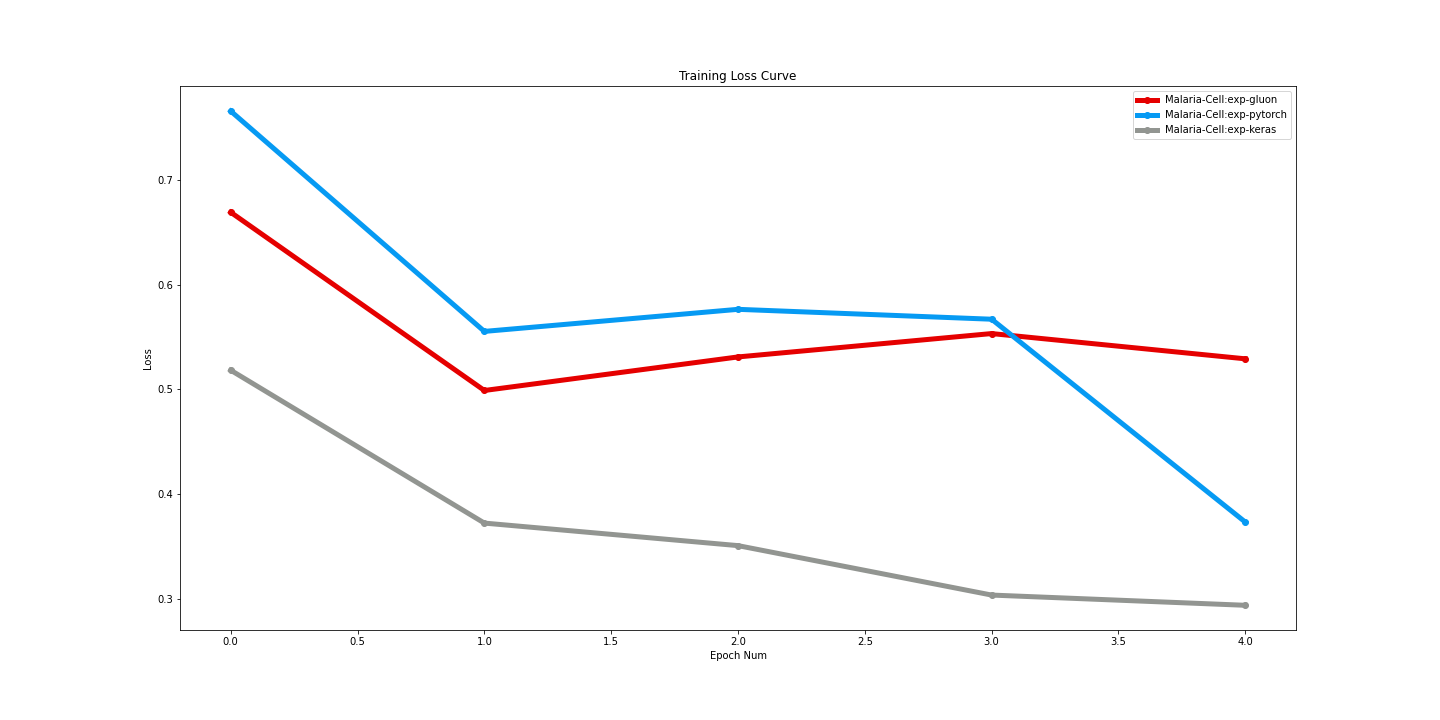

In [18]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/train_loss.png") 

### Validation Accuracy Curves

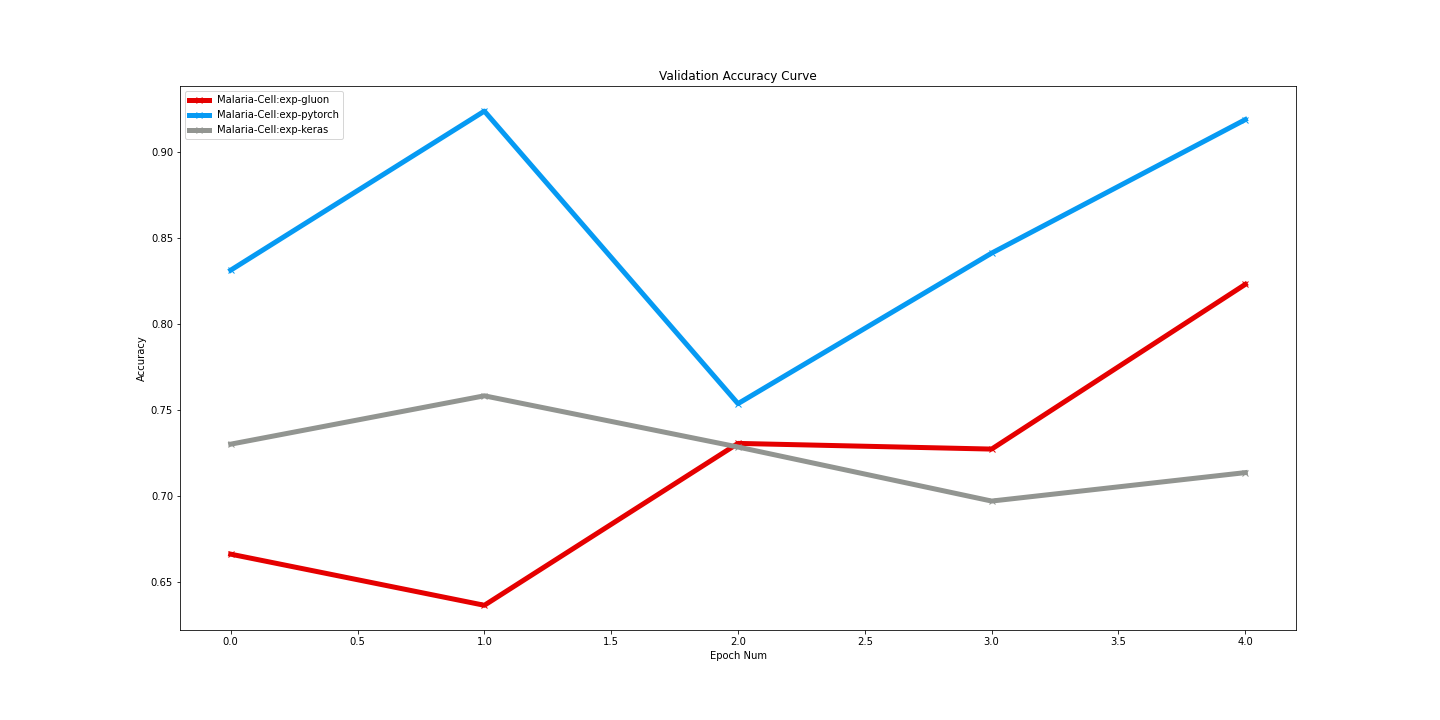

In [19]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/val_accuracy.png") 

### Validation loss curves

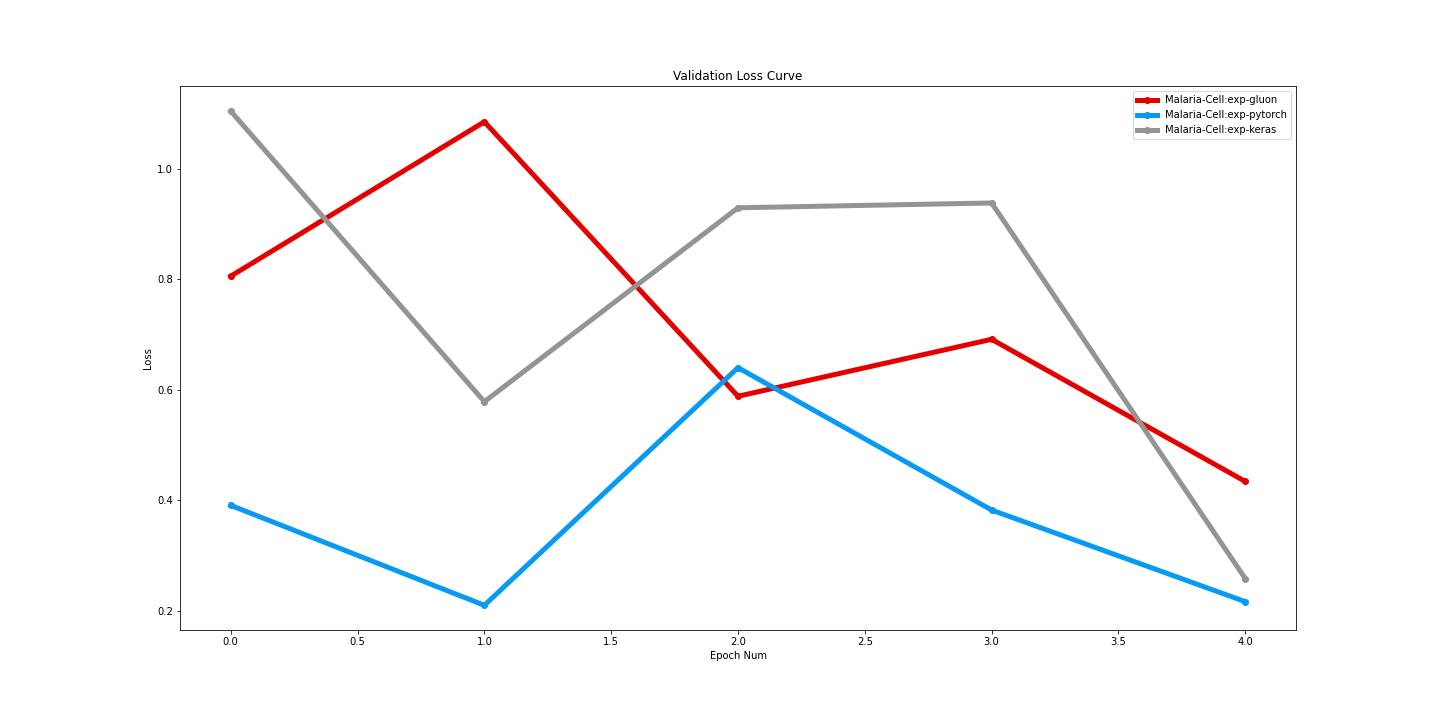

In [20]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/val_loss.png") 

### Training time curves

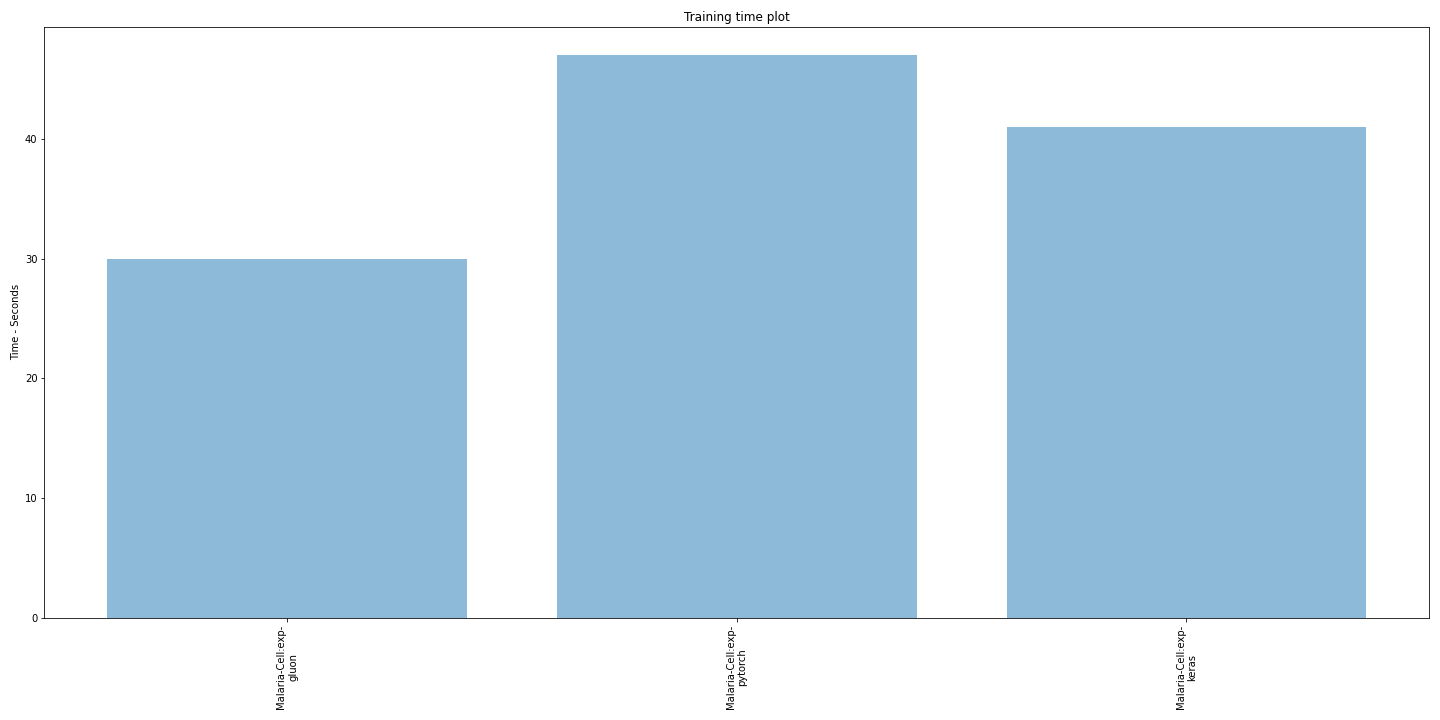

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/stats_training_time.png") 

### Max GPU usages

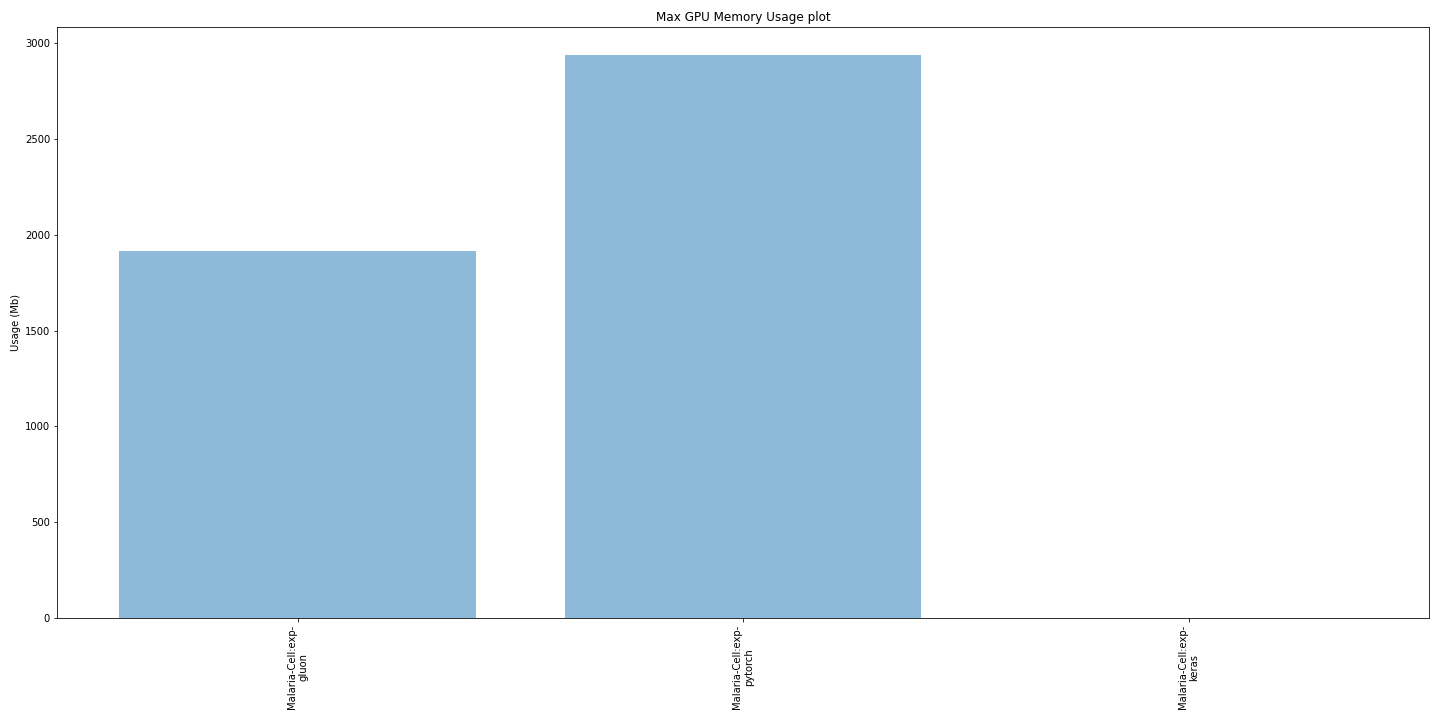

In [22]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/stats_max_gpu_usage.png") 

### Best Validation accuracies

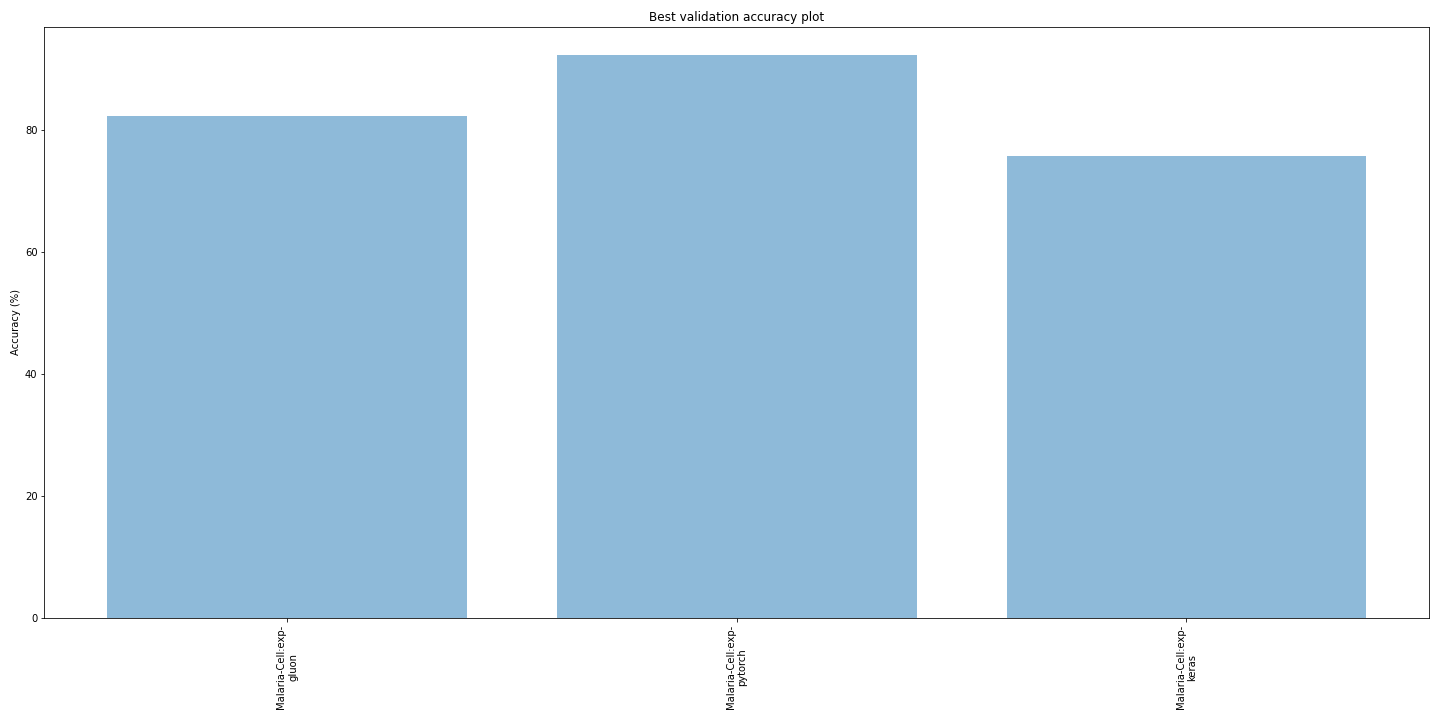

In [23]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/stats_best_val_acc.png") 

# Goals

### 1. Understand how you can compare experiments on same data

### 2. Understand where to look for comparison data - logs, charts, graphs, etc when comparing experiments


### 3. Steps completed
    - Train three classifiers by keeping all parameters same and changing backends
    - Compare the three experiments